In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random
import os

In [2]:
%run ./Combine_csv.ipynb

In [3]:
import datetime

now = datetime.datetime.now()


Today_time = now.strftime("%H:%M")

Today_date = now.strftime("%Y-%m-%d")


In [4]:
prefix_dir =r"C:\Users\drago\Documents\GitHub\Summer-Project\Lifestyle\Combined CSV\ "
suffix_dir = 'combined_lifestyle-'+Today_date+'.csv'
today_csv=prefix_dir[:-1] +suffix_dir

In [5]:
today_csv

'C:\\Users\\drago\\Documents\\GitHub\\Summer-Project\\Lifestyle\\Combined CSV\\combined_lifestyle-2019-06-02.csv'

In [6]:
lifestyle = pd.read_csv(today_csv)

In [7]:
lifestyle


,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,HT Brunch Cover Story: Mixed doubles with Just...,2019-06-02,00:29:00,https://www.hindustantimes.com/brunch/ht-brunc...
1,Hindiustan Times,Travel: Mermaids in the Maldives,2019-06-02,00:19:00,https://www.hindustantimes.com/brunch/travel-m...
2,Hindiustan Times,"HT Brunch Fashion Edit: One blouse, two ways t...",2019-06-01,23:19:00,https://www.hindustantimes.com/brunch/ht-brunc...
3,Hindiustan Times,Sunday Drive by Hormazd Sorabjee: The silence ...,2019-06-02,00:08:00,https://www.hindustantimes.com/brunch/sunday-d...
4,Hindiustan Times,Taste of home: Breaking bread with expats,2019-06-02,13:39:00,https://www.hindustantimes.com/more-lifestyle/...
5,Hindiustan Times,It’s all a one-bird orchestra: The greater rac...,2019-06-02,13:18:00,https://www.hindustantimes.com/more-lifestyle/...
6,Hindiustan Times,Into the quaint world of rare book dealers,2019-06-02,12:49:00,https://www.hindustantimes.com/more-lifestyle/...
7,Hindiustan Times,Here’s a list of advantages that extroverts en...,2019-06-02,09:20:00,https://www.hindustantimes.com/sex-and-relatio...
8,Hindiustan Times,HT Brunch Cover Story: Mixed doubles with Just...,2019-06-02,00:29:00,https://www.hindustantimes.com/brunch/ht-brunc...
9,Hindiustan Times,Travel: Mermaids in the Maldives,2019-06-02,00:19:00,https://www.hindustantimes.com/brunch/travel-m...


In [8]:
lifestyle.shape

(62, 5)

In [9]:
Heading = lifestyle['Heading']

In [10]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopset = set(stopwords.words('english'))

## Tokenizing and Stemming

In [13]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [15]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [16]:
Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [17]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [18]:
words_frame.head(10)

,words
ht,ht
brunch,brunch
cover,cover
stori,story
mix,mixed
doubl,doubles
with,with
justin,justine
henin,henin
and,and


## TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

In [20]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [21]:
print(tfidf_matrix.shape)

(62, 1263)


In [22]:
terms = vectorizer.get_feature_names()

### Cosine Similarity

In [23]:
from sklearn.metrics.pairwise import cosine_similarity


In [24]:
dist = cosine_similarity(tfidf_matrix)

In [25]:
dist.shape

(62, 62)

### K-Means

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


In [27]:
n_clusters = list (range (14,20))
min=999
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    if min>score:
        min=score
        n_score=n
    print ("For n = {}, silhouette score is {})".format(n, score))
    

For n = 14, silhouette score is 0.1771289404452902)
For n = 15, silhouette score is 0.16569275432274327)
For n = 16, silhouette score is 0.1829832264319032)
For n = 17, silhouette score is 0.1923341605855774)
For n = 18, silhouette score is 0.22129974073126416)
For n = 19, silhouette score is 0.1842825089757435)


In [28]:
n_score

15

In [29]:
num_clusters = n_score
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
clusters = km.labels_.tolist()

In [31]:
lifestyle['Cluster'] = clusters

In [32]:
lifestyle['Cluster'].value_counts()

0     16
3      9
14     4
12     4
11     4
13     3
10     3
6      3
5      3
2      3
9      2
8      2
7      2
4      2
1      2
Name: Cluster, dtype: int64

### Plotting the points


In [33]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [34]:
cluster_names = {}
keys = range(n_score)   ## n_score = number of clusters
for i in keys:
       cluster_names[i] = 'Cluster '+str(i)
print(cluster_names)

{0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9', 10: 'Cluster 10', 11: 'Cluster 11', 12: 'Cluster 12', 13: 'Cluster 13', 14: 'Cluster 14'}


In [35]:
number_of_colors = n_score

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cluster_colors={}
for i in range(len(color)):
    cluster_colors[i]=color[i]
print(cluster_colors)

{0: '#99CCB3', 1: '#6AEE0C', 2: '#C9FE70', 3: '#E45BB1', 4: '#021F30', 5: '#E53CD0', 6: '#C89EAD', 7: '#E6F7E4', 8: '#9F8BD5', 9: '#320EB8', 10: '#D0C748', 11: '#1A4871', 12: '#0EEFC4', 13: '#04B2D2', 14: '#B6F2FC'}


In [36]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
0,0.017926,0.006608,2,HT Brunch Cover Story: Mixed doubles with Just...
1,0.010010,0.013712,4,Travel: Mermaids in the Maldives
2,-0.006085,0.018536,10,"HT Brunch Fashion Edit: One blouse, two ways t..."
3,0.013135,0.009361,1,Sunday Drive by Hormazd Sorabjee: The silence ...
4,0.000563,0.000432,12,Taste of home: Breaking bread with expats


In [37]:
groups = df_plot.groupby('label')

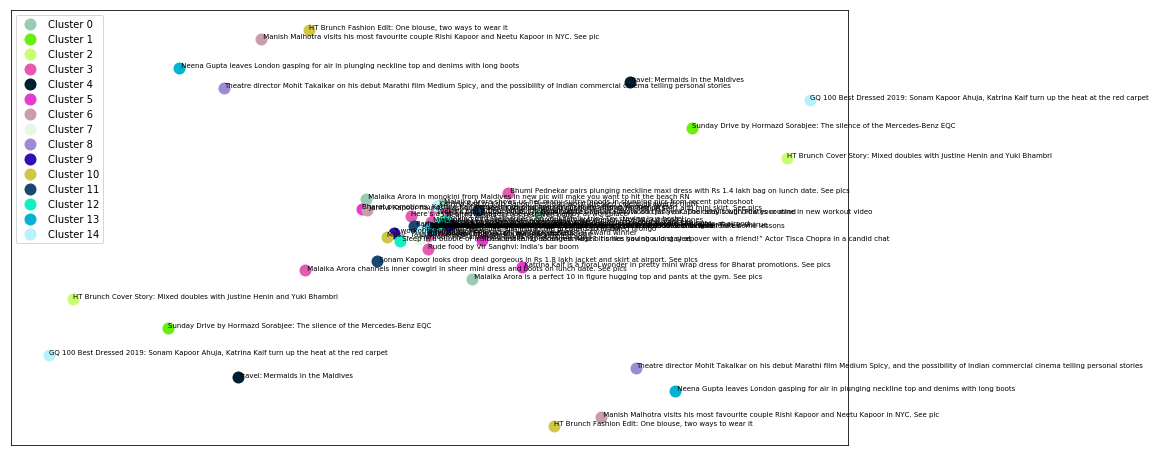

In [38]:
fig, ax = plt.subplots(figsize=(15, 8))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

## Cluster Similarity


In [39]:
df_sorted=lifestyle.sort_values(by='Cluster').reset_index()
df_sorted.drop(['index'],axis=1,inplace=True)

In [40]:
df_sorted

,Newspaper,Heading,Date,Time,URL,Cluster
0,Indian Express,A trifle of great importance,2019-06-02,11:01:47:00,https://indianexpress.com/article/lifestyle/fo...,0
1,Hindiustan Times,ATPAR empowers the differently-abled with the ...,2019-06-01,17:43:00,https://www.hindustantimes.com/more-lifestyle/...,0
2,Hindiustan Times,"To have, or not to have, coconut oil...",2019-06-02,12:22:00,https://www.hindustantimes.com/wellness/to-hav...,0
3,Hindiustan Times,Tips to help you with pre-wedding jitters,2019-06-01,17:30:00,https://www.hindustantimes.com/sex-and-relatio...,0
4,Indian Express,"Buckwheat Canapes, for that mindful snacking",2019-06-02,13:42:46:00,https://indianexpress.com/article/lifestyle/fo...,0
5,Indian Express,Ravi Jadhav: From a mill worker to a National ...,2019-06-02,10:48:22:00,https://indianexpress.com/article/lifestyle/ar...,0
6,Indian Express,Eid ul Fitr 2019: Know the Last day of Ramadan,2019-06-02,09:11:11:00,https://indianexpress.com/article/lifestyle/li...,0
7,Hindiustan Times,Spectator by Seema Goswami: Page-turners,2019-06-01,23:11:00,https://www.hindustantimes.com/brunch/spectato...,0
8,Indian Express,Simply South,2019-06-02,00:10:10:00,https://indianexpress.com/article/lifestyle/si...,0
9,India Today,Priyanka Chopra denies meeting BFF Meghan Mar...,2019-06-02,15:12,https://timesofindia.indiatimes.com/lifestyle/...,0


In [41]:
grp = lifestyle.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [42]:
cluster_similarity_value =[]
def cluster_similarity(cluster):
    try:
        x=[]

        cluster_heading=cluster['Heading']
        #print(cluster['Heading'])
        cluster_matrix = vectorizer.fit_transform(cluster_heading)
        cluster_dist = cosine_similarity(cluster_matrix)
        cluster_elements_count = pd.DataFrame.count(cluster)
        #print(cluster_elements_count[0])


        for i in cluster_dist:
            #z=(i.sum()-1)/cluster_elements_count
            if((cluster_elements_count[0]-1)==0):
                y=1
            else:
                y=float("{0:.2f}".format(((i.sum())/(cluster_elements_count[0]))))
            x.append(y)
            cluster_similarity_value.append(y)

        
        print(x)

        print()
        print()
    except:
        for i in range(len(cluster['Heading'])):
            x.append(1)
            cluster_similarity_value.append(1)
        print(x)
        print()
        print()

In [43]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))

[0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.06, 0.07, 0.08, 0.06]


[1, 1]


[0.67, 0.33, 0.67]


[0.12, 0.12, 0.12, 0.11, 0.12, 0.11, 0.11, 0.12, 0.12]


[1, 1]


[0.38, 0.37, 0.34]


[0.33, 0.67, 0.67]


[0.5, 0.5]


[1, 1]


[0.5, 0.5]


[0.67, 0.33, 0.67]


[0.26, 0.26, 0.25, 0.27]


[0.26, 0.26, 0.26, 0.27]


[0.33, 0.67, 0.67]


[0.51, 0.51, 0.25, 0.27]




In [44]:
df_sorted['cluster_similarity_value']=cluster_similarity_value

In [45]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].mean()


Cluster
0     0.063125
1     1.000000
2     0.556667
3     0.116667
4     1.000000
5     0.363333
6     0.556667
7     0.500000
8     1.000000
9     0.500000
10    0.556667
11    0.260000
12    0.262500
13    0.556667
14    0.385000
Name: cluster_similarity_value, dtype: float64

In [46]:
df_sorted.head()

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,Indian Express,A trifle of great importance,2019-06-02,11:01:47:00,https://indianexpress.com/article/lifestyle/fo...,0,0.06
1,Hindiustan Times,ATPAR empowers the differently-abled with the ...,2019-06-01,17:43:00,https://www.hindustantimes.com/more-lifestyle/...,0,0.06
2,Hindiustan Times,"To have, or not to have, coconut oil...",2019-06-02,12:22:00,https://www.hindustantimes.com/wellness/to-hav...,0,0.06
3,Hindiustan Times,Tips to help you with pre-wedding jitters,2019-06-01,17:30:00,https://www.hindustantimes.com/sex-and-relatio...,0,0.06
4,Indian Express,"Buckwheat Canapes, for that mindful snacking",2019-06-02,13:42:46:00,https://indianexpress.com/article/lifestyle/fo...,0,0.06


In [47]:
grp = df_sorted.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [48]:
col=df_sorted.columns

In [49]:
temp_more =[]
temp_less  =[]

In [50]:
def fix_you(cluster):
    cluster_mean = cluster['cluster_similarity_value'].mean()
    for i in range(len(cluster)):
        if (cluster.iloc[i]['cluster_similarity_value']<cluster_mean):
            temp_less.append(cluster.iloc[i])
        else:
            temp_more.append(cluster.iloc[i])

In [51]:
for i in range(n_score):
    fix_you(grp.get_group(i))


In [52]:
df_more_similar=pd.DataFrame(temp_more,columns=col)
df_less_similar=pd.DataFrame(temp_less,columns=col)

In [53]:
Result = df_more_similar.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 
Result.head()

,,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,11,India Today,Gym buddies Malaika Arora and Janhvi Kapoor s...,2019-06-02,15:12,https://timesofindia.indiatimes.com/lifestyle/...,0,0.07
1,17,Hindiustan Times,Sunday Drive by Hormazd Sorabjee: The silence ...,2019-06-02,00:08:00,https://www.hindustantimes.com/brunch/sunday-d...,1,1.00
2,18,Hindiustan Times,HT Brunch Cover Story: Mixed doubles with Just...,2019-06-02,00:29:00,https://www.hindustantimes.com/brunch/ht-brunc...,2,0.67
3,23,Indian Express,"Don’t call it Darjeeling, it’s Nepali tea",2019-06-01,17:48:36:00,https://indianexpress.com/article/lifestyle/fo...,3,0.12
4,31,Hindiustan Times,Travel: Mermaids in the Maldives,2019-06-02,00:19:00,https://www.hindustantimes.com/brunch/travel-m...,4,1.00


In [54]:
Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [55]:
Result = Result.append(df_less_similar)

In [56]:
Result = Result.sort_values(by='Cluster')

In [59]:
Result=Result.reset_index().drop(['index'],axis=1)

In [60]:
Result

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,Gym buddies Malaika Arora and Janhvi Kapoor s...,2019-06-02,15:12,https://timesofindia.indiatimes.com/lifestyle/...,0,0.07
1,Hindiustan Times,Spectator by Seema Goswami: Page-turners,2019-06-01,23:11:00,https://www.hindustantimes.com/brunch/spectato...,0,0.06
2,Hindiustan Times,ATPAR empowers the differently-abled with the ...,2019-06-01,17:43:00,https://www.hindustantimes.com/more-lifestyle/...,0,0.06
3,Hindiustan Times,"To have, or not to have, coconut oil...",2019-06-02,12:22:00,https://www.hindustantimes.com/wellness/to-hav...,0,0.06
4,Hindiustan Times,Tips to help you with pre-wedding jitters,2019-06-01,17:30:00,https://www.hindustantimes.com/sex-and-relatio...,0,0.06
5,Indian Express,"Buckwheat Canapes, for that mindful snacking",2019-06-02,13:42:46:00,https://indianexpress.com/article/lifestyle/fo...,0,0.06
6,Indian Express,Ravi Jadhav: From a mill worker to a National ...,2019-06-02,10:48:22:00,https://indianexpress.com/article/lifestyle/ar...,0,0.06
7,Hindiustan Times,Core training and the six pack mania,2019-06-01,19:06:00,https://www.hindustantimes.com/brunch/core-tra...,0,0.06
8,Indian Express,Simply South,2019-06-02,00:10:10:00,https://indianexpress.com/article/lifestyle/si...,0,0.06
9,India Today,Priyanka Chopra denies meeting BFF Meghan Mar...,2019-06-02,15:12,https://timesofindia.indiatimes.com/lifestyle/...,0,0.06


In [62]:
outname ='Lifestyle-'+str(Today_date)+'.csv'
x=r"C:\Users\drago\Documents\GitHub\Summer-Project\Lifestyle\Output CSV\ "
if not os.path.exists(x[:-1]):
    os.mkdir(x[:-1])
date_today= Today_date +'\ '
outdir=x[:-1]
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname)

In [63]:
Result.to_csv(fullname,index=False,encoding='utf-8')

In [64]:
pd.read_csv(fullname)

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,Gym buddies Malaika Arora and Janhvi Kapoor s...,2019-06-02,15:12,https://timesofindia.indiatimes.com/lifestyle/...,0,0.07
1,Hindiustan Times,Spectator by Seema Goswami: Page-turners,2019-06-01,23:11:00,https://www.hindustantimes.com/brunch/spectato...,0,0.06
2,Hindiustan Times,ATPAR empowers the differently-abled with the ...,2019-06-01,17:43:00,https://www.hindustantimes.com/more-lifestyle/...,0,0.06
3,Hindiustan Times,"To have, or not to have, coconut oil...",2019-06-02,12:22:00,https://www.hindustantimes.com/wellness/to-hav...,0,0.06
4,Hindiustan Times,Tips to help you with pre-wedding jitters,2019-06-01,17:30:00,https://www.hindustantimes.com/sex-and-relatio...,0,0.06
5,Indian Express,"Buckwheat Canapes, for that mindful snacking",2019-06-02,13:42:46:00,https://indianexpress.com/article/lifestyle/fo...,0,0.06
6,Indian Express,Ravi Jadhav: From a mill worker to a National ...,2019-06-02,10:48:22:00,https://indianexpress.com/article/lifestyle/ar...,0,0.06
7,Hindiustan Times,Core training and the six pack mania,2019-06-01,19:06:00,https://www.hindustantimes.com/brunch/core-tra...,0,0.06
8,Indian Express,Simply South,2019-06-02,00:10:10:00,https://indianexpress.com/article/lifestyle/si...,0,0.06
9,India Today,Priyanka Chopra denies meeting BFF Meghan Mar...,2019-06-02,15:12,https://timesofindia.indiatimes.com/lifestyle/...,0,0.06
